In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [100]:
def solveSpring(method,v,k,m,x,dt,t,tend):    
    pos = []
    vel = []
    energy = []
    times = []

    e_start = 0.5*m*v**2 + 0.5*k*x**2
    
    totalT = tend - t
    Nsteps = totalT // dt
    #set new dt to get exact conversation
    
    dt = totalT/Nsteps



    while t <= tend + 1e-9:
        pos.append(x)
        vel.append(v)
        e = 0.5*m*v**2 + 0.5*k*x**2
        energy.append(e)
        times.append(t)
        
        if method == 'euler':

            a = -k*x/m
            x = x + v*dt
            v = v + a*dt

        elif method == 'euler-cromer':

            a = -k*x/m
            v = v + a*dt
            x = x + v*dt

        elif method == 'pc-simple':

            a = -k*x/m
            x1 = x + v*dt
            v1 = v + a*dt
            a1 = -k*x1/m

            x = x + 0.5*(v1+v)*dt
            v = v + 0.5*(a1+a)*dt

        elif method == 'rk2':

            a0 = -k*x/m
            x0 = x
            v0 = v

            # first step

            x1 = x0 + 0.5*dt*v0
            v1 = v0 + 0.5*dt*a0
            a1 = -k*x1/m

            x = x0 + v1*dt
            v = v0 + a1*dt

        elif method == 'rk4':

            x1 = x
            v1 = v
            a1 = -k*x1/m

            x2 = x1+v1*dt/2
            v2 = v1+a1*dt/2
            a2 = -k*x2/m

            x3 = x1+v2*dt/2
            v3 = v1+a2*dt/2
            a3 = -k*x3/m

            x4 = x1+v3*dt
            v4 = v1+a3*dt
            a4 = -k*x4/m

            x = x + (dt/6.0)*(v1 + 2*v2 + 2*v3 + v4)
            v = v + (dt/6.0)*(a1 + 2*a2 + 2*a3 + a4)

        else:
            print("not supported:", method)
            break

        



        #print(t,x,v,energy)
        t += dt
        
    return np.array([times,pos,vel,energy])


In [119]:
v = 1.0
k = 1.0
m = 1.0
x = 0
dt = 3.14159
t = 0
tend = 4.0*np.pi#2.0*2.0*3.14159
w = (k/m)**(1/2)
x_m = 1


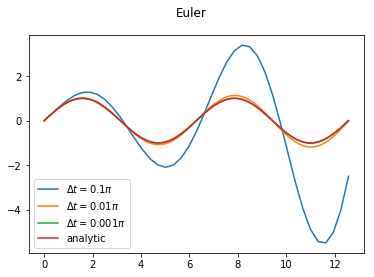

In [120]:
for dt in [0.1,0.01,0.001]:    
    times,pos,vel,energy = solveSpring('euler',v,k,m,x,dt*np.pi,t,tend)
    plt.plot(times,pos,label='$\Delta t = %g \pi$' % dt)

plt.suptitle('Euler')
plt.plot(times,x_m*np.sin(w*times),label='analytic')
plt.legend()

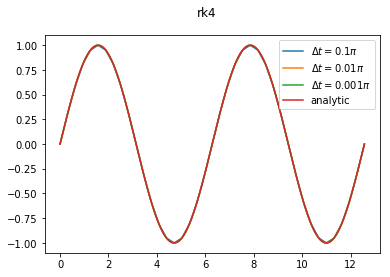

In [121]:
for dt in [0.1,0.01,0.001]:    
    times,pos,vel,energy = solveSpring('rk4',v,k,m,x,dt*np.pi,t,tend)
    plt.plot(times,pos,label='$\Delta t = %g \pi$' % dt)

plt.suptitle('rk4')
plt.plot(times,x_m*np.sin(w*times),label='analytic')
plt.legend()

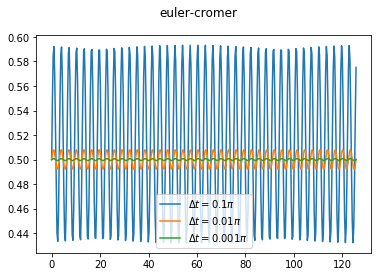

In [171]:
for dt in [0.1,0.01,0.001]:    
    times,pos,vel,energy = solveSpring('euler-cromer',v,k,m,x,dt*np.pi,t,tend)
    #plt.plot(times,pos,label='$\Delta t = %g \pi$' % dt)
    plt.plot(times,energy,label='$\Delta t = %g \pi$' % dt)

plt.suptitle('euler-cromer')
#plt.plot(times,x_m*np.sin(w*times),label='analytic')
plt.legend()

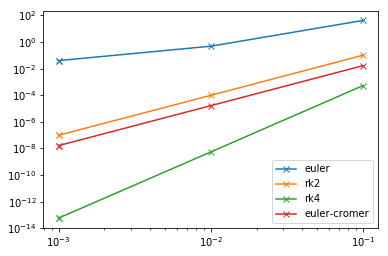

In [172]:
tend = 4. * np.pi
for method in ['euler','rk2','rk4','euler-cromer']:
    Eps = []
    dts = [0.1,0.01,0.001,0.001]
    for dt in dts: 
        times,pos,vel,energy = solveSpring(method,v,k,m,x,dt*np.pi,t,tend)
        eps = np.abs(energy[-1] - energy[0])/energy[0]
        Eps.append(eps)
    
    plt.loglog(dts,Eps,'x-',label=method) 
plt.legend()

In [158]:
orders = {
    'euler' : 1,
    'rk2' : 3,
    'rk4' : 5,
    'euler-cromer' : 3,
}

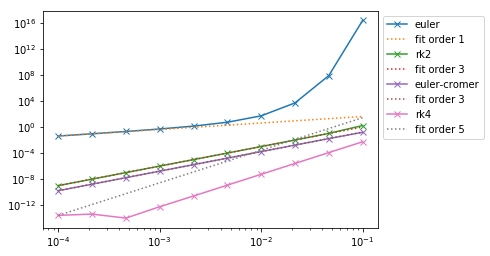

In [167]:
tend = 40. * np.pi
for method in ['euler','rk2','euler-cromer','rk4',]:
    Eps = []
    dts = np.logspace(-4,-1,num=10)
    for dt in dts: 
        times,pos,vel,energy = solveSpring(method,v,k,m,x,dt*np.pi,t,tend)
        eps = np.abs(energy[-1] - energy[0])/energy[0]
        Eps.append(eps)
    
    plt.loglog(dts,Eps,'x-',label=method) 
    plt.loglog([dts[0],dts[-1]],[Eps[0],Eps[0] * (dts[-1]/dts[0])**(orders[method])],':',
               label='fit order %d' % orders[method])    

    
plt.legend(loc='upper left',bbox_to_anchor=(1.,1.))